In [1]:
# Importaçoes iniciais 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb



In [2]:
from google.colab import files
arquivo = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Veja a distribuição dos dados.

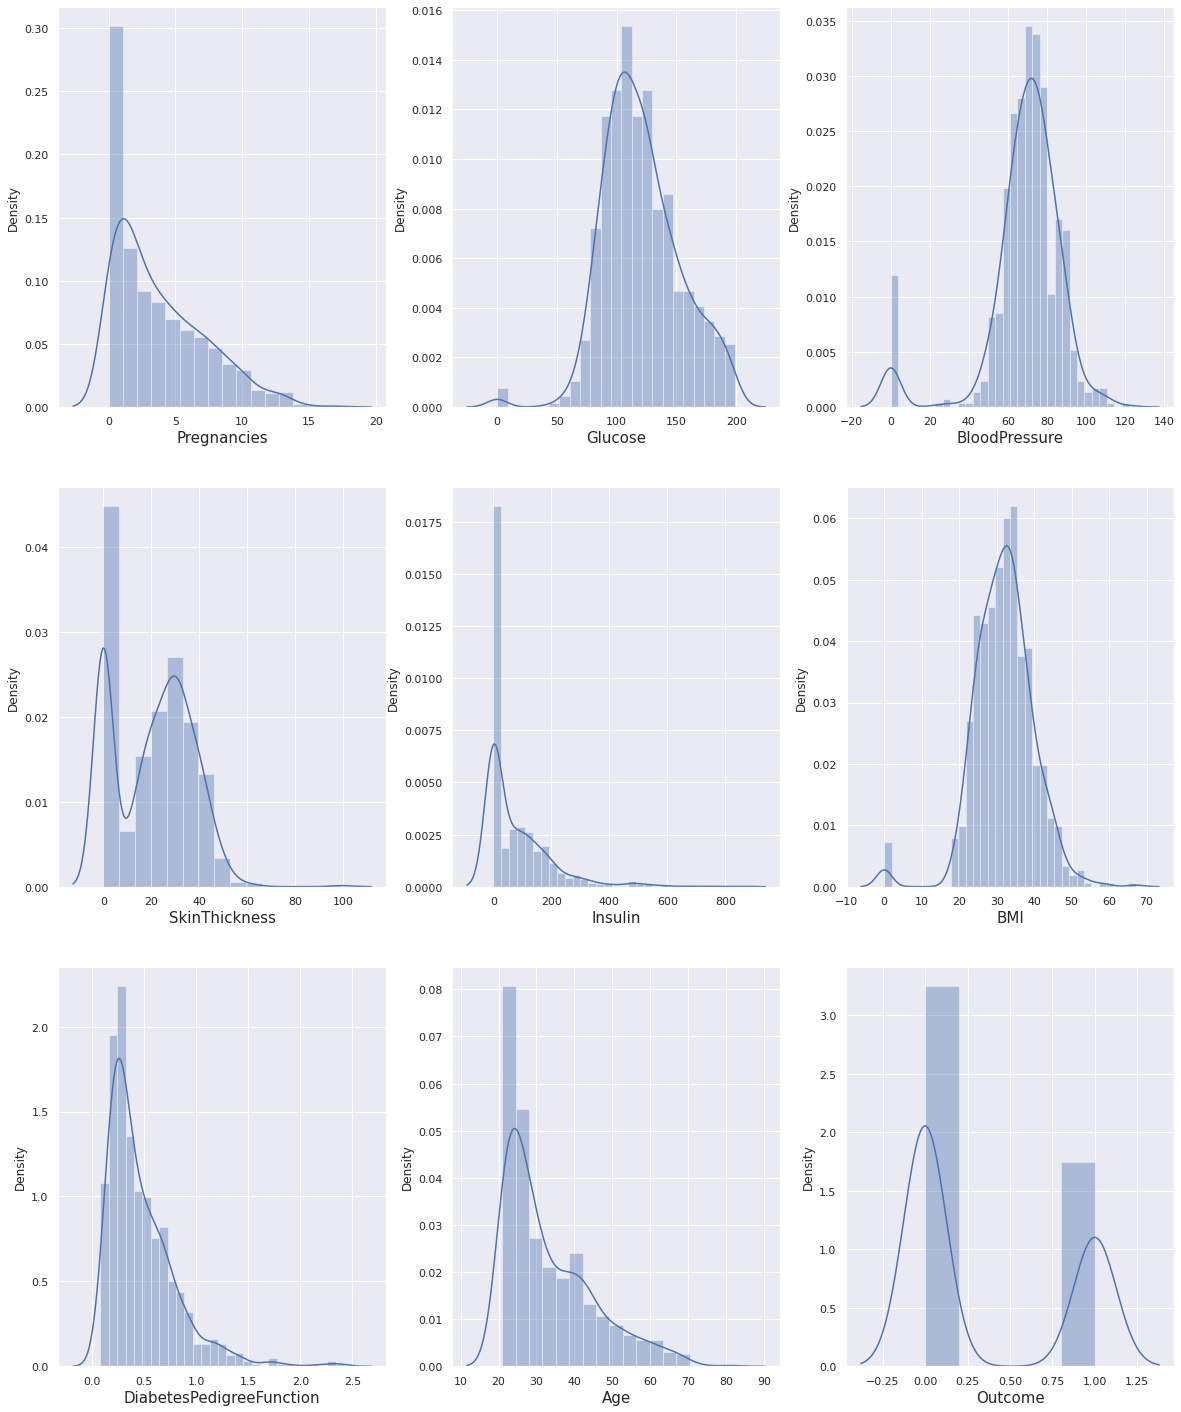

In [7]:
# let's see how data is distributed for every column.

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

Pode-se observar uma distorção nos dados.

Pode-se observar que Glucose, Insulin, Skin Thickness, BMI e Blood Pressure apresentam valores em 0. Isso não é desejável. Pode-se remover estes dados ou substituir pela média de valores.

In [10]:
# substituição dos valores zerados pela média da coluna  

data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

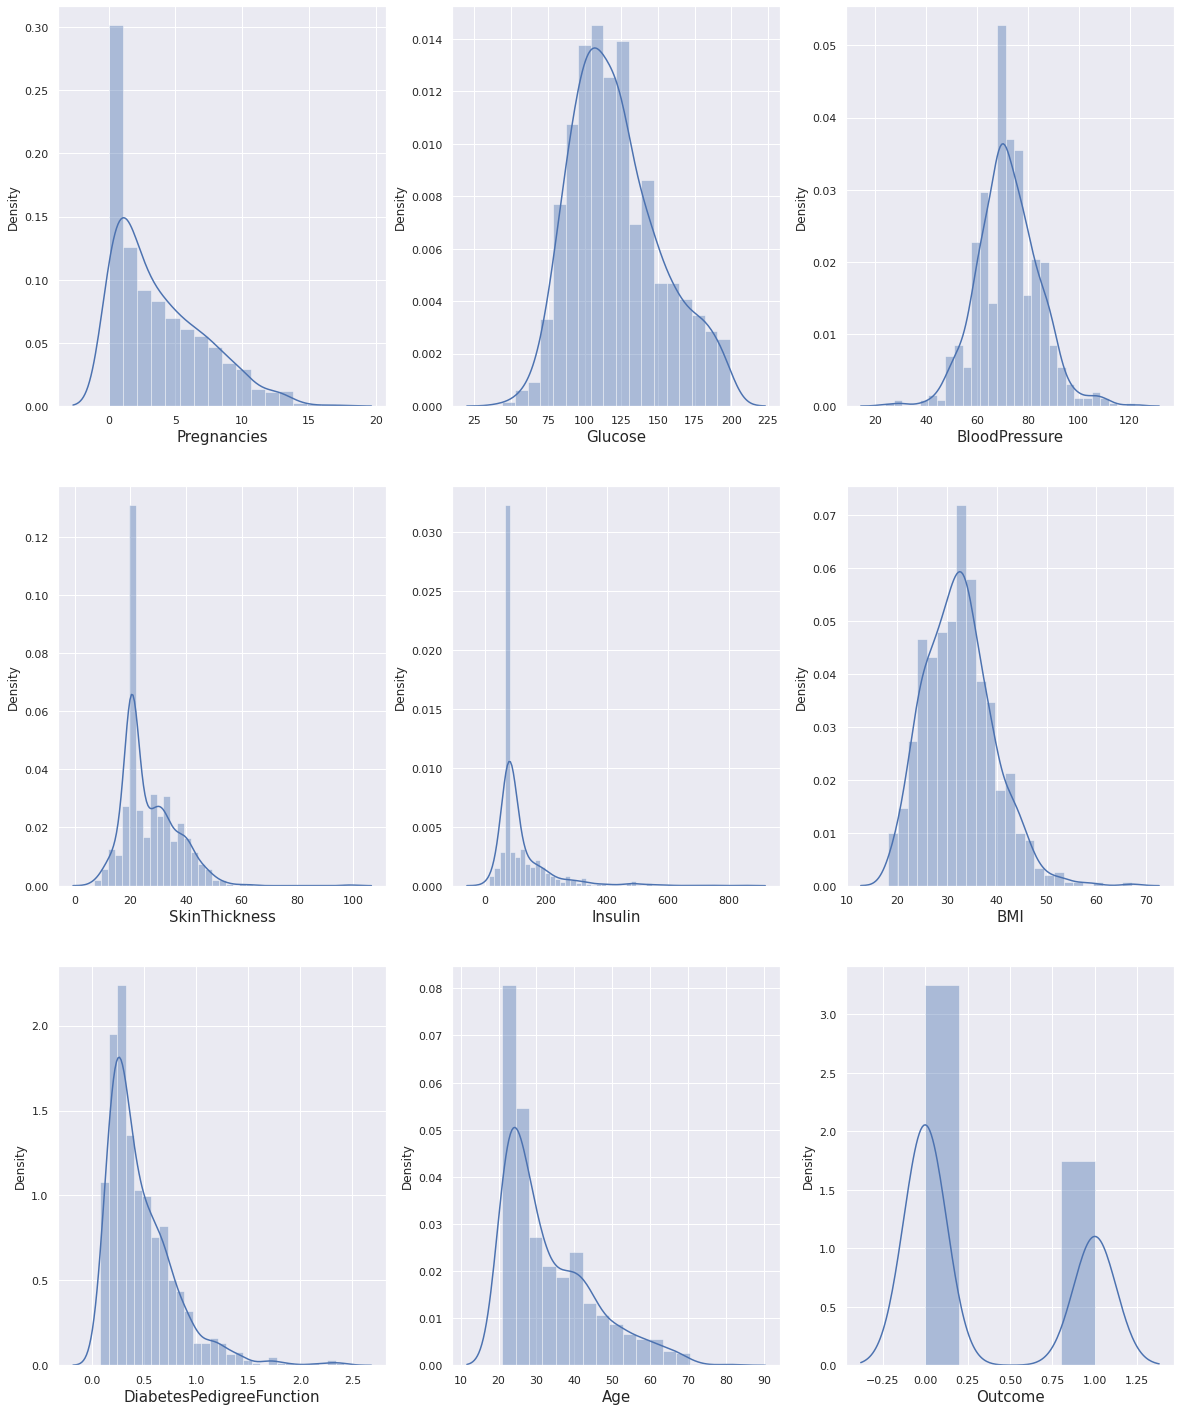

In [11]:
# Verifica novamente a distribuição dos dados

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

Now we have dealt with the 0 values and data looks better.But, there still are outliers present in some columns. Let's deal with them.

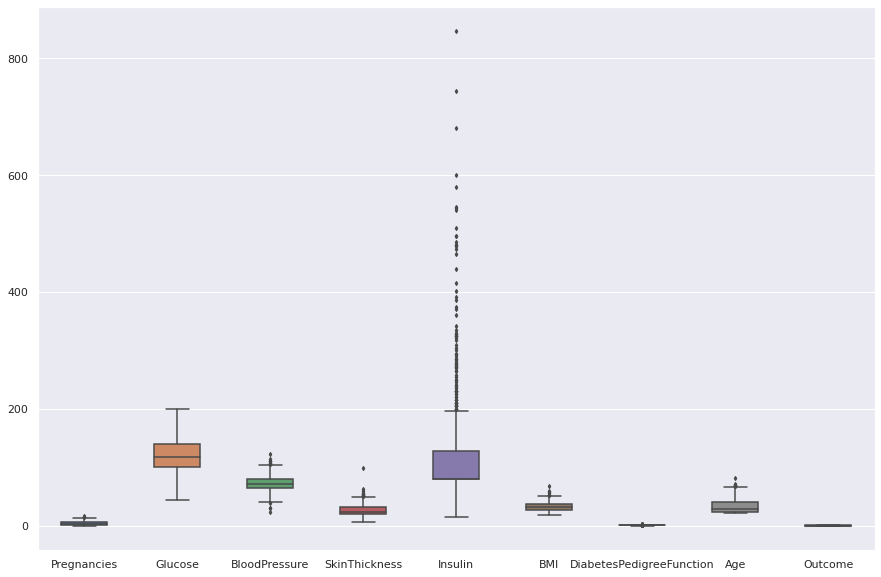

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)
plt.show()

In [12]:
outlier = data['Pregnancies'].quantile(0.98)
# removing the top 2% data from the pregnancies column
data = data[data['Pregnancies']<outlier]

outlier = data['BMI'].quantile(0.99)
# removing the top 1% data from BMI column
data = data[data['BMI']<outlier]

outlier = data['SkinThickness'].quantile(0.99)
# removing the top 1% data from SkinThickness column
data = data[data['SkinThickness']<outlier]

outlier = data['Insulin'].quantile(0.95)
# removing the top 5% data from Insulin column
data = data[data['Insulin']<outlier]

outlier = data['DiabetesPedigreeFunction'].quantile(0.99)
# removing the top 1% data from DiabetesPedigreeFunction column
data = data[data['DiabetesPedigreeFunction']<outlier]

outlier = data['Age'].quantile(0.99)
# removing the top 1% data from Age column
data = data[data['Age']<outlier]

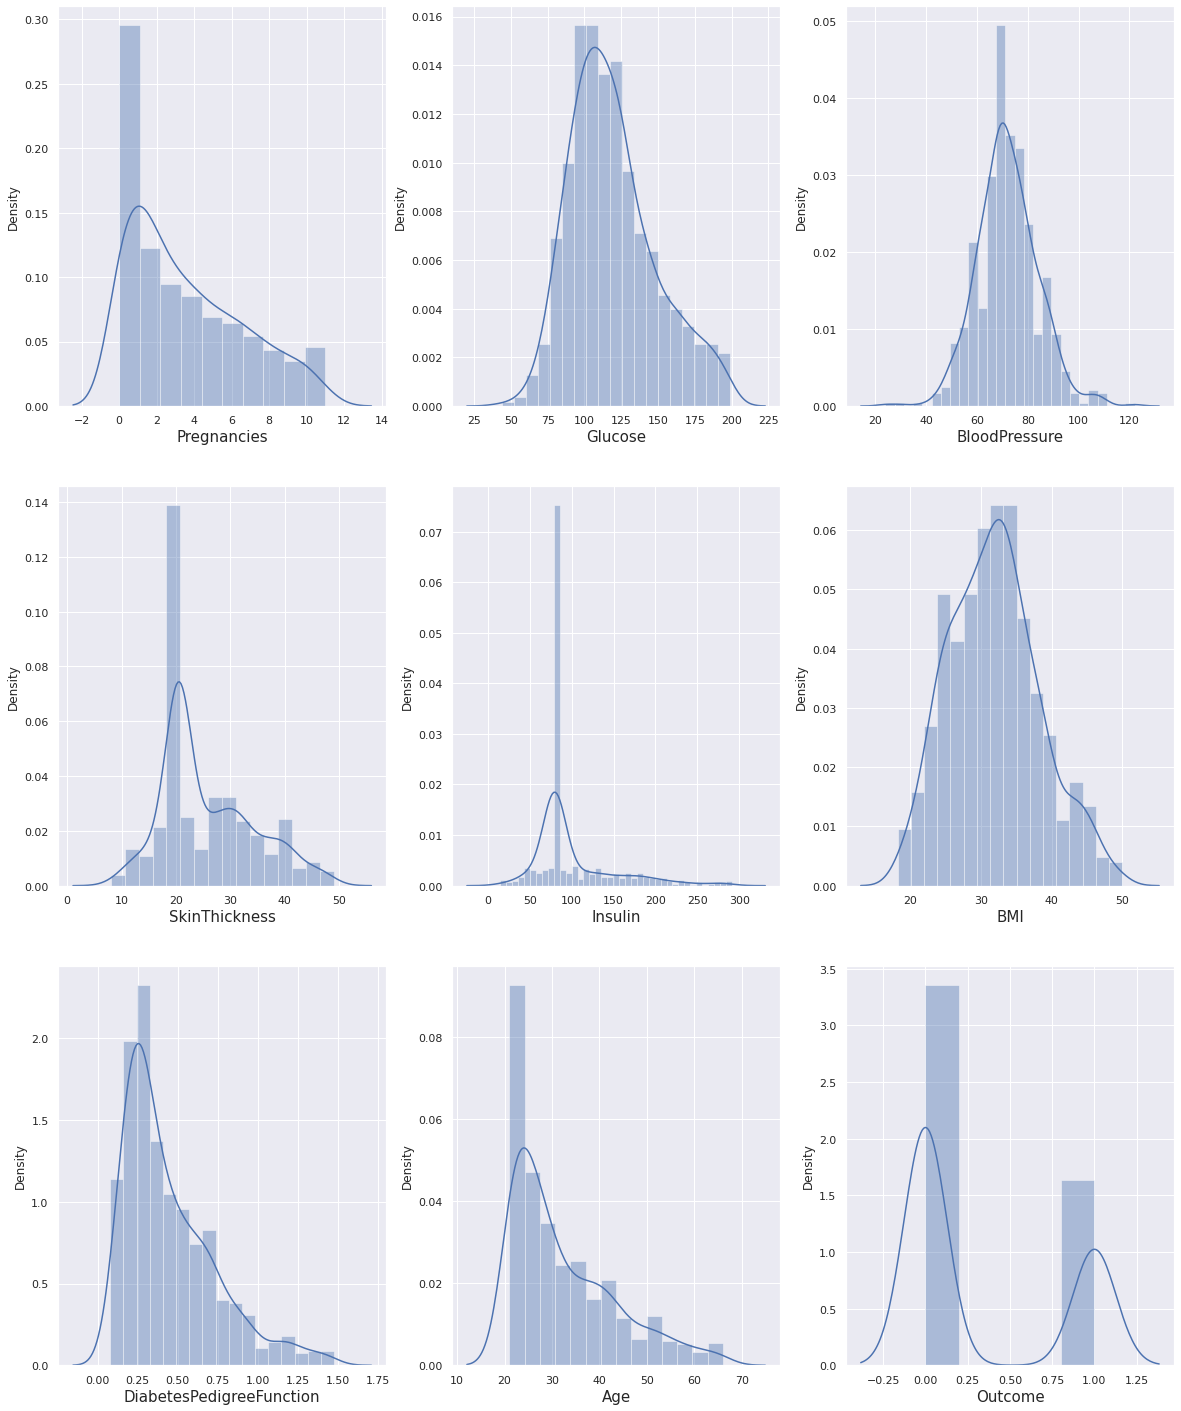

In [13]:
# Verifica novamente a distribuição dos dados

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

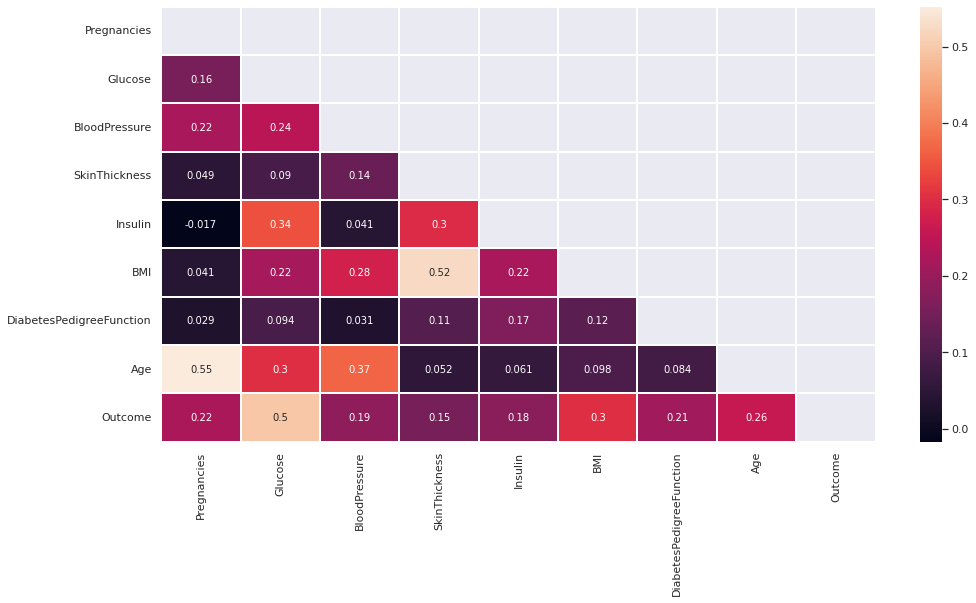

In [14]:
plt.figure(figsize = (16, 8))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [15]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [16]:
# separação em dados de treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
# normalização

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Treinamento

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_train_acc = accuracy_score(y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 0.805940594059406
Test Accuracy of Logistic Regression Model is 0.7751479289940828


In [19]:
# Matriz de confusão 

confusion_matrix(y_test, y_pred)

array([[106,  11],
       [ 27,  25]])

In [20]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       117
           1       0.69      0.48      0.57        52

    accuracy                           0.78       169
   macro avg       0.75      0.69      0.71       169
weighted avg       0.77      0.78      0.76       169



## K Neighbors Classifier (KNN)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Model is {knn_test_acc}")

Training Accuracy of KNN Model is 0.8376237623762376
Test Accuracy of KNN Model is 0.7514792899408284


In [22]:
# Matriz de confusão 

confusion_matrix(y_test, y_pred)

array([[103,  14],
       [ 28,  24]])

In [23]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       117
           1       0.63      0.46      0.53        52

    accuracy                           0.75       169
   macro avg       0.71      0.67      0.68       169
weighted avg       0.74      0.75      0.74       169



## Support Vector Classifier

In [24]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.8534653465346534
Test Accuracy of SVC Model is 0.7633136094674556


In [25]:
# Matriz de confusão 

confusion_matrix(y_test, y_pred)

array([[101,  16],
       [ 24,  28]])

In [26]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       117
           1       0.64      0.54      0.58        52

    accuracy                           0.76       169
   macro avg       0.72      0.70      0.71       169
weighted avg       0.76      0.76      0.76       169



## Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 1.0
Test Accuracy of Decision Tree Model is 0.6627218934911243


In [28]:
# Matriz de confusão 

confusion_matrix(y_test, y_pred)

array([[86, 31],
       [26, 26]])

In [29]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       117
           1       0.46      0.50      0.48        52

    accuracy                           0.66       169
   macro avg       0.61      0.62      0.61       169
weighted avg       0.67      0.66      0.67       169



In [30]:
# Ajuste dos hiper parametros 

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [31]:
# Melhores parametros e melhor score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 5}
0.7683168316831683


In [32]:
dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decesion Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decesion Tree Model is 0.80990099009901
Test Accuracy of Decision Tree Model is 0.7100591715976331


In [33]:
# Matriz de confusão 

confusion_matrix(y_test, y_pred)

array([[85, 32],
       [17, 35]])

In [34]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       117
           1       0.52      0.67      0.59        52

    accuracy                           0.71       169
   macro avg       0.68      0.70      0.68       169
weighted avg       0.74      0.71      0.72       169



## Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 0.8138613861386138
Test Accuracy of Random Forest Model is 0.7633136094674556


In [36]:
# Matriz de confusão 

confusion_matrix(y_test, y_pred)

array([[109,   8],
       [ 32,  20]])

In [37]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       117
           1       0.71      0.38      0.50        52

    accuracy                           0.76       169
   macro avg       0.74      0.66      0.67       169
weighted avg       0.75      0.76      0.74       169



##BAGGING

### Cria uma instância do Método Bagging com Árvore de Decisão

In [38]:

import numpy as np
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
X_fit, X_eval, y_fit, y_eval= model_selection.train_test_split( X_train, y_train, test_size=0.30, random_state=1 )

In [40]:
seed = 7
kfold = model_selection.KFold(n_splits=10)


In [41]:
cart = DecisionTreeClassifier()
num_trees = 100

In [42]:
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)


In [43]:
results = model_selection.cross_val_score(model, X_fit, y_fit,cv=kfold)
for i in range(len(results)):
    print("Model: "+str(i)+" Accuracy is: "+str(results[i]))


Model: 0 Accuracy is: 0.8055555555555556
Model: 1 Accuracy is: 0.6666666666666666
Model: 2 Accuracy is: 0.7777777777777778
Model: 3 Accuracy is: 0.7142857142857143
Model: 4 Accuracy is: 0.8
Model: 5 Accuracy is: 0.7714285714285715
Model: 6 Accuracy is: 0.6857142857142857
Model: 7 Accuracy is: 0.8285714285714286
Model: 8 Accuracy is: 0.7428571428571429
Model: 9 Accuracy is: 0.7142857142857143


In [44]:
print("Mean Accuracy is: "+str(results.mean()))

Mean Accuracy is: 0.7507142857142858


In [45]:
model.fit(X_fit, y_fit)
pred_label = model.predict(X_eval)
nnz = np.shape(y_eval)[0] - np.count_nonzero(pred_label - y_eval)
acc = 100*nnz/np.shape(y_eval)[0]
print('accuracy is: '+str(acc))

accuracy is: 75.0


## Boosting

### Ada Boost Classifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=5,
                                                                                min_samples_leaf=9,
                                                                                min_samples_split=5)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [47]:
# Melhores parametros e melhor score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 50}
0.7742574257425743


In [48]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate = 0.001, n_estimators = 120)
ada.fit(X_train, y_train)

ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Ada Boost Model is {ada_train_acc}")
print(f"Test Accuracy of Ada Boost Model is {ada_test_acc}")

Training Accuracy of Ada Boost Model is 0.80990099009901
Test Accuracy of Ada Boost Model is 0.7633136094674556


In [49]:
# Matriz de confusão 

confusion_matrix(y_test, y_pred)

array([[109,   8],
       [ 32,  20]])

In [50]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       117
           1       0.71      0.38      0.50        52

    accuracy                           0.76       169
   macro avg       0.74      0.66      0.67       169
weighted avg       0.75      0.76      0.74       169



## Gradient Boosting Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [52]:
# Melhores parametros e melhor score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 200}
0.7643564356435644


In [53]:
gb = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 150)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

gb_train_acc = accuracy_score(y_train, gb.predict(X_train))
gb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Gradient Boosting Classifier Model is {gb_train_acc}")
print(f"Test Accuracy of Gradient Boosting Classifier Model is {gb_test_acc}")

Training Accuracy of Gradient Boosting Classifier Model is 0.9801980198019802
Test Accuracy of Gradient Boosting Classifier Model is 0.7751479289940828


In [54]:
# Matriz de confusão 

confusion_matrix(y_test, y_pred)

array([[102,  15],
       [ 23,  29]])

In [55]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       117
           1       0.66      0.56      0.60        52

    accuracy                           0.78       169
   macro avg       0.74      0.71      0.72       169
weighted avg       0.77      0.78      0.77       169



### Stochastic Gradient Boosting (SGB)

In [61]:
sgbc = GradientBoostingClassifier(learning_rate = 0.1, subsample = 0.9, max_features = 0.75, loss = 'deviance',
                                  n_estimators = 100)

sgbc.fit(X_train, y_train)

y_pred = sgbc.predict(X_test)

sgbc_train_acc = accuracy_score(y_train, sgbc.predict(X_train))
sgbc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SGB Model is {sgbc_train_acc}")
print(f"Test Accuracy of SGB Model is {sgbc_test_acc}")

Training Accuracy of SGB Model is 0.9425742574257425
Test Accuracy of SGB Model is 0.7692307692307693


In [62]:
# Matriz de confusão 

confusion_matrix(y_test, y_pred)

array([[101,  16],
       [ 23,  29]])

In [63]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       117
           1       0.64      0.56      0.60        52

    accuracy                           0.77       169
   macro avg       0.73      0.71      0.72       169
weighted avg       0.76      0.77      0.76       169



### Cat Boost Classifier

In [60]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 48 kB/s 


In [64]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations = 30, learning_rate = 0.1)
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

0:	learn: 0.6684908	total: 55.8ms	remaining: 1.62s
1:	learn: 0.6473152	total: 60.6ms	remaining: 848ms
2:	learn: 0.6301843	total: 65ms	remaining: 585ms
3:	learn: 0.6099791	total: 68ms	remaining: 442ms
4:	learn: 0.5928931	total: 71.8ms	remaining: 359ms
5:	learn: 0.5788398	total: 75.7ms	remaining: 303ms
6:	learn: 0.5664744	total: 79.6ms	remaining: 262ms
7:	learn: 0.5560134	total: 81.5ms	remaining: 224ms
8:	learn: 0.5449953	total: 89.5ms	remaining: 209ms
9:	learn: 0.5350870	total: 93.7ms	remaining: 187ms
10:	learn: 0.5259774	total: 96.3ms	remaining: 166ms
11:	learn: 0.5173412	total: 110ms	remaining: 165ms
12:	learn: 0.5079766	total: 113ms	remaining: 147ms
13:	learn: 0.4997023	total: 115ms	remaining: 132ms
14:	learn: 0.4923216	total: 126ms	remaining: 126ms
15:	learn: 0.4855090	total: 128ms	remaining: 112ms
16:	learn: 0.4792331	total: 131ms	remaining: 100ms
17:	learn: 0.4726980	total: 147ms	remaining: 97.8ms
18:	learn: 0.4668411	total: 153ms	remaining: 88.6ms
19:	learn: 0.4619382	total: 163m

In [65]:

cat_train_acc = accuracy_score(y_train, cat.predict(X_train))
cat_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Cat Boost Classifier Model is {cat_train_acc}")
print(f"Test Accuracy of Cat Boost Classifier Model is {cat_test_acc}")

Training Accuracy of Cat Boost Classifier Model is 0.8198019801980198
Test Accuracy of Cat Boost Classifier Model is 0.7751479289940828


### Extreme Gradient Boosting (XGBoost) 

In [66]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, max_depth = 3, n_estimators = 10)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of XGB Model is {xgb_train_acc}")
print(f"Test Accuracy of XGB Model is {xgb_test_acc}")

Training Accuracy of XGB Model is 0.6851485148514852
Test Accuracy of XGB Model is 0.7159763313609467


## Stacking

In [67]:
# Divisão de conjunto de treino e teste em 50% 

from sklearn.model_selection import train_test_split

train, val_train, test, val_test = train_test_split(X, y, test_size = 0.5, random_state = 355)

In [68]:
# Divisão de conjunto de treino e teste em 20%

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 355)

In [69]:
# uso de Logistic Regression e SVM como modelos de base
# Deve-se treina-los com os dados de treino X_train e y_train 

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [70]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

Verifique as predições dos modelos de base com dados de validação.

In [71]:
predict_val1 = lr.predict(val_train)
predict_val2 = svm.predict(val_train)

Empilhar os valores de predição para validação. 

In [72]:
predict_val = np.column_stack((predict_val1, predict_val2))

Predição dos modelos de base.

In [73]:
predict_test1 = lr.predict(X_test)
predict_test2 = svm.predict(X_test)

Empilhar os modelos com dados de validação em 'prediction_test'

In [74]:
predict_test = np.column_stack((predict_test1, predict_test2))

Empilhar os dados de 'predict_val' and val_test como input feature para o meta_model randomforest classifier.

In [75]:
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val, val_test)

RandomForestClassifier()

Verificar a acurácia do meta_model usando predict_test e y_test.

In [76]:
stacking_acc = accuracy_score(y_test, rand_clf.predict(predict_test))
print(stacking_acc)

0.8235294117647058


In [77]:
# Matriz de confusão 

confusion_matrix(y_test, rand_clf.predict(predict_test))

array([[43,  5],
       [ 7, 13]])

In [78]:
# classification report

print(classification_report(y_test, rand_clf.predict(predict_test)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        48
           1       0.72      0.65      0.68        20

    accuracy                           0.82        68
   macro avg       0.79      0.77      0.78        68
weighted avg       0.82      0.82      0.82        68



#### Acuracia melhor com o uso de stacking.

In [79]:
models = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boosting', 'SGB', 'XgBoost', 'Stacking', 'Cat Boost']
scores = [lr_test_acc, knn_test_acc, svc_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_test_acc, sgbc_test_acc, xgb_test_acc, stacking_acc, cat_test_acc]

models = pd.DataFrame({'Model' : models, 'Score' : scores})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
9,Stacking,0.823529
0,Logistic Regression,0.775148
6,Gradient Boosting,0.775148
10,Cat Boost,0.775148
7,SGB,0.769231
2,SVC,0.763314
4,Random Forest,0.763314
5,Ada Boost,0.763314
1,KNN,0.751479
8,XgBoost,0.715976


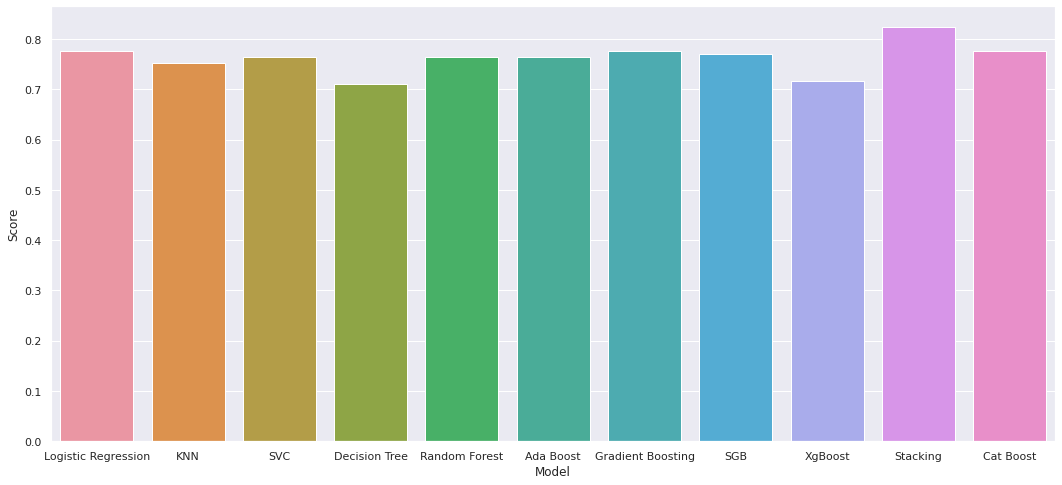

In [80]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

### Melhores resultados com "Cat Boost" e "Stacking" .